# Train test splitting ✂️

###### Imports

In [131]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
# Import the data
df = pd.read_csv("Life Expectancy Data.csv")

###### 

To perform the train test splitting we need to separate the **features** from the **target**. Once finished we can use an in-built Python function to split the data, using a stratified approach to ensure there is an equal proportion of each country in both the training and testing datasets. This prevents one dataset (train or test) from being disproportionately composed of a certain country, which could lead to misleading performance metrics.

In [43]:
# Split the columns into the features and the target:
feature_cols = list(df.columns)
feature_cols.remove('Life_expectancy')
X = df[feature_cols]
y = df['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 104, stratify = X['Country'])

# Reset indices to avoid challenges later on:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Exploratory data analysis 🕵️

The first part of exploration we did was to check the **data types** of each variable. To be able to use a linear regression model we need **all** variables to be numeric so this helps us identify which variables we need to alter.

In [49]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

All data types are numeric other than **Country** and **Region** so if we choose to include these in the model we would need to either map these to numbers or use one-hot encoding.

Next we looked at some **aggregate statistics** for each of the variables to get an overview of the data and checked to see if we had to deal with any **null or duplicate values**. None were found, so we began our exploration on the **correlation** between variables.

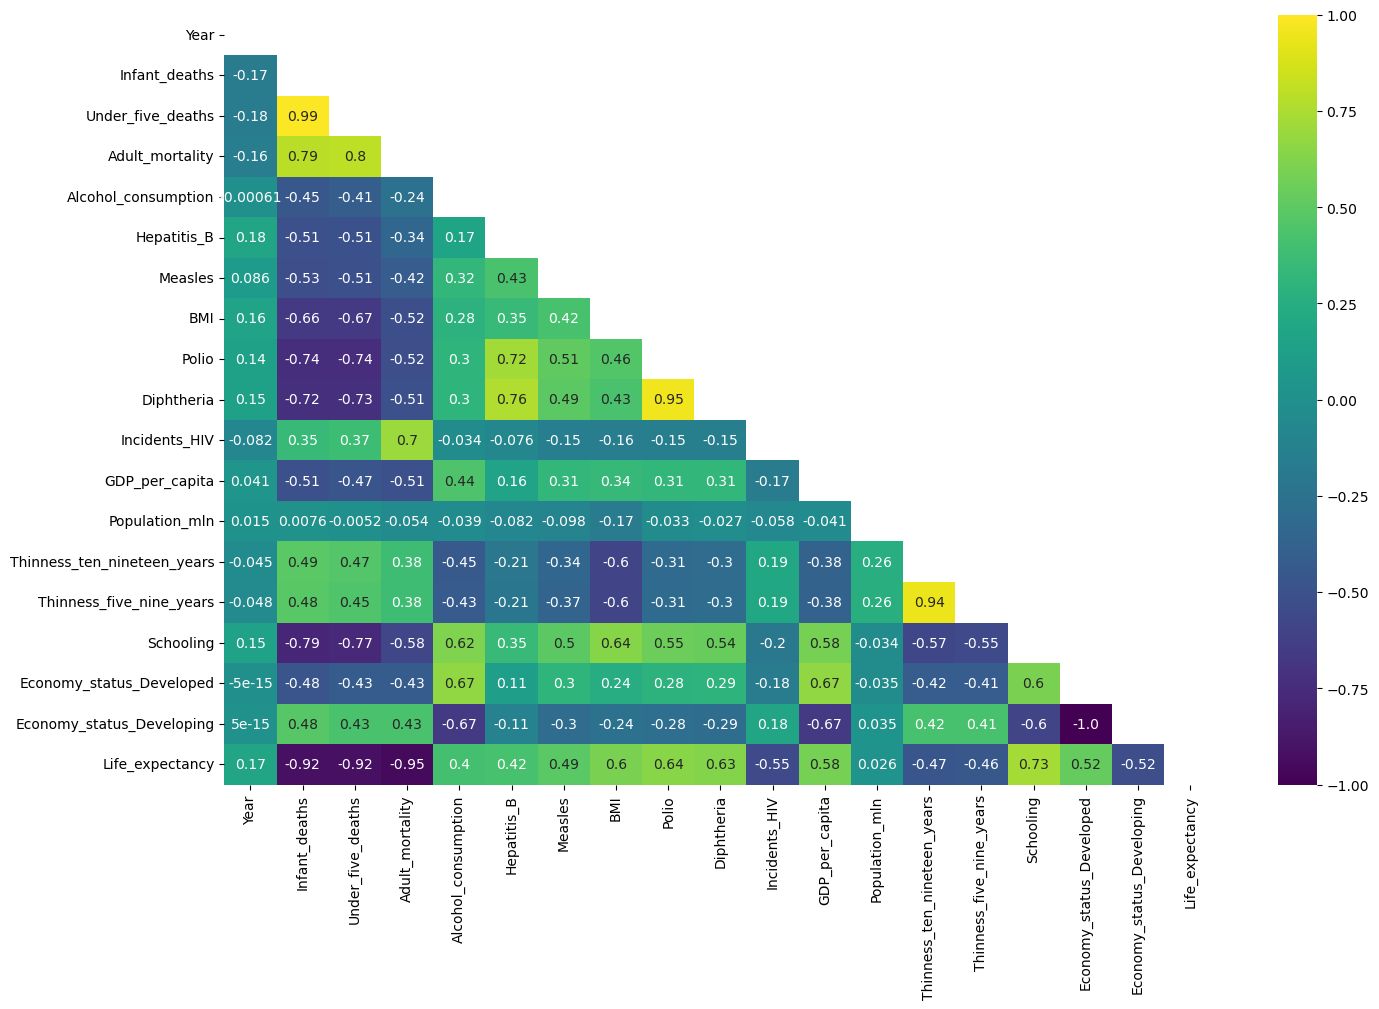

In [153]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(numeric_only = True),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis',
            fmt = '0.2',
            mask = np.triu(df.corr(numeric_only = True)))
plt.show()

There is a clear **negative correlation** between life expectancy and infant deaths, under 5 deaths and adult mortality, indicating that these features could be really good at prediction in the model. There's evidence of **multicollinearity** between variables too, most notably between the developed and developing economy statuses which can be seen by the perfect negative correlation. 

To guage these relationships more clearly we analysed a pairplot and found two clear non-linear relationships between life expectancy and the features **Incidents_HIV** and **GDP_per_capita**. We tried transforming these variables using logarithms to ensure they suited a linear regression model before adding this transformation into the feature engineering.

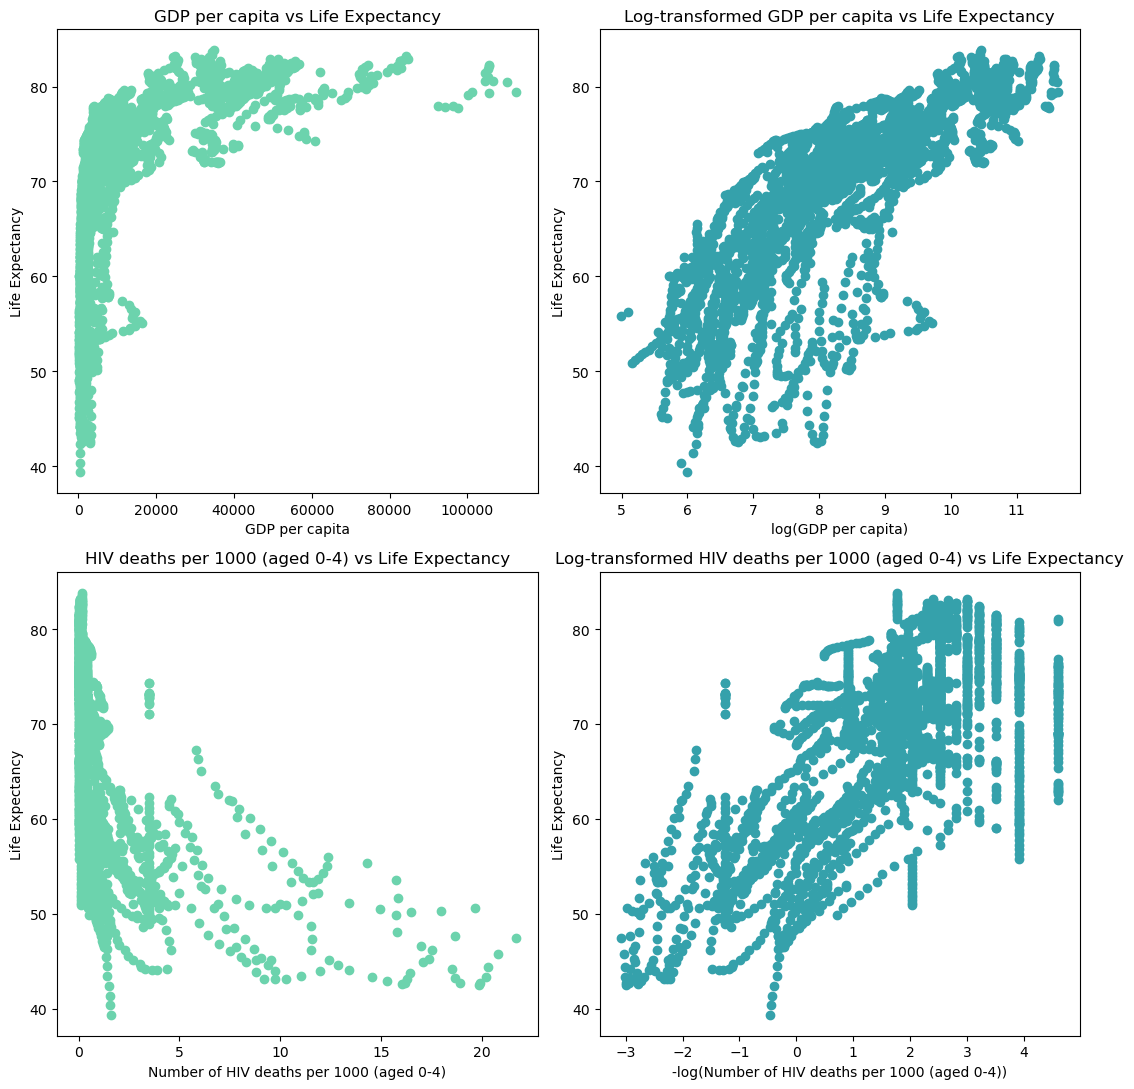

In [141]:
fig, axs = plt.subplots(2, 2, figsize=(11, 11))  # 2 rows, 2 columns

# Plot the first scatter plot
axs[0, 0].scatter(df['GDP_per_capita'], df['Life_expectancy'], color='#6CD3ADFF')
axs[0, 0].set_title('GDP per capita vs Life Expectancy')
axs[0, 0].set_xlabel('GDP per capita')
axs[0, 0].set_ylabel('Life Expectancy')

# Plot the second scatter plot
axs[0, 1].scatter(df['GDP_per_capita'].apply(lambda x: np.log(x)), df['Life_expectancy'], color='#35A1ABFF')
axs[0, 1].set_title('Log-transformed GDP per capita vs Life Expectancy')
axs[0, 1].set_xlabel('log(GDP per capita)')
axs[0, 1].set_ylabel('Life Expectancy')

# Plot the third scatter plot
axs[1, 0].scatter(df['Incidents_HIV'], df['Life_expectancy'], color='#6CD3ADFF')
axs[1, 0].set_title('HIV deaths per 1000 (aged 0-4) vs Life Expectancy')
axs[1, 0].set_xlabel('Number of HIV deaths per 1000 (aged 0-4)')
axs[1, 0].set_ylabel('Life Expectancy')

# Plot the fourth scatter plot
axs[1, 1].scatter(df['Incidents_HIV'].apply(lambda x: -np.log(x)), df['Life_expectancy'], color='#35A1ABFF')
axs[1, 1].set_title('Log-transformed HIV deaths per 1000 (aged 0-4) vs Life Expectancy')
axs[1, 1].set_xlabel('-log(Number of HIV deaths per 1000 (aged 0-4))')
axs[1, 1].set_ylabel('Life Expectancy')

plt.tight_layout()
plt.show()


As shown above, the logarithmic transformations made both variables have a much more linear relationship with life expectancy so this has been implemented wthin our feature engineering.